In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
!pip install ccxt seaborn pandas-datareader yfinance yahoofinancials
import seaborn as sns
from matplotlib import pyplot as plt
import pandas_datareader as web
import yfinance as yf
from yahoofinancials import YahooFinancials
import time
from datetime import datetime, timedelta, date, time
import os

In [3]:
coins = ["BTC-USD", "ETH-USD", "BNB-USD","XRP-USD","ADA-USD","MATIC-USD","SOL-USD","DOT-USD", "SHIB-USD","APE-USD"]

close_list = []

d0 = date(2023, 3, 28)
d1 = date(2019, 1, 1)
days = abs(d0-d1).days+1

for i in coins:
    yahoo_financials = YahooFinancials(i) # gets data of coin from yahoo api
    data=yahoo_financials.get_historical_price_data("2019-01-01", "2023-03-28", "daily") #gets daily data from 2019 - 2023  
    
    df = pd.DataFrame(data[i]['prices']) #prices column of the coin
    zero_padding_len = days - len(df)
    zero_padding = pd.DataFrame(np.zeros(zero_padding_len, dtype=float))
    df = pd.concat([zero_padding, df])
    close_list.append(df["close"]) #adds close data of each coin in close_list

In [4]:
close_list = np.array(close_list)
close_list[pd.isna(close_list)] = 0

In [5]:
def get_digits(num):
    count = 0
    while(num > 0):
        num = num//10
        count = count + 1
    return count

def normalize(coin_list): #gets a single coin's prices
    max_num = coin_list.max()
    max_len_max_price = get_digits(max_num)
    return coin_list/10**max_len_max_price

In [6]:
for i in range (0, len(close_list)):
    close_list[i] = normalize(close_list[i])

In [8]:
close_list = close_list.T
close_df = pd.DataFrame(close_list, columns = coins)

In [9]:
dates = []
start_date = "2019-01-01"
for i in range(0,len(close_list)):
    dates.append(pd.to_datetime(start_date)+timedelta(i))

close_df["dates"] = dates    
close_df.to_csv("close_prices.csv")

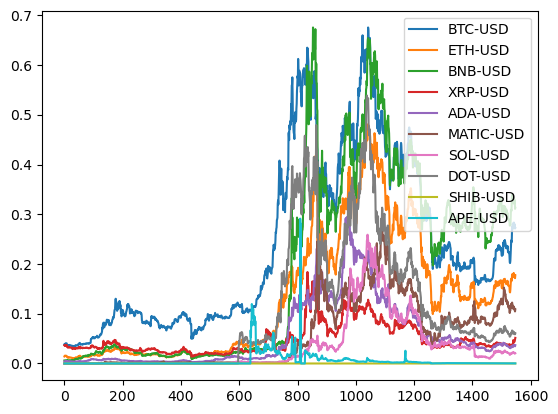

In [12]:
for coin in coins:
    plt.plot(close_df[coin], label = coin)
plt.legend(loc="upper right")
plt.show()
    

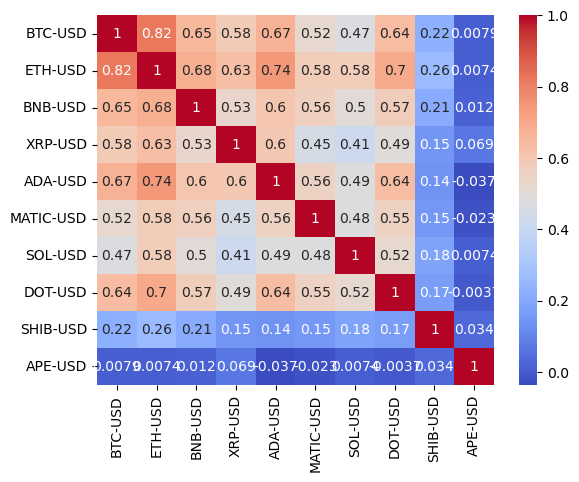

In [13]:
close1_df = close_df.drop(columns="dates").pct_change().corr(method="pearson")#taking the price difference between price of x day to price of previous day
sns.heatmap(close1_df, annot = True, cmap= "coolwarm")
plt.show()

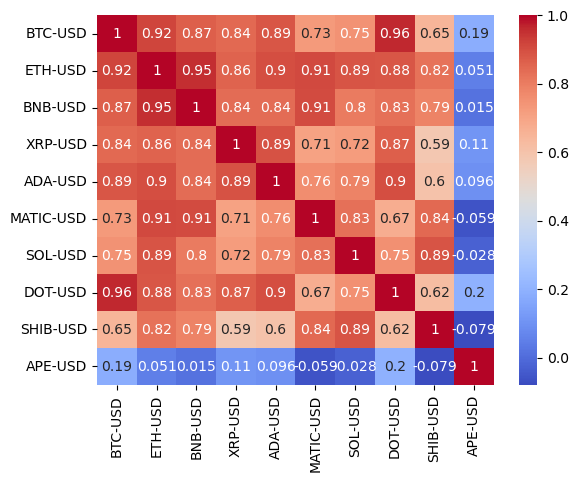

In [14]:
close2_df = close_df.drop(columns="dates").corr(method="pearson") #correlation of close price directly

sns.heatmap(close2_df, annot = True, cmap = "coolwarm")
plt.show()